# AES Analysis

## Import Dependency Module

In [1]:
from timeit import default_timer as timer
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import string
import random
import os
from aes128 import AES as AES_128
from aes192 import AES as AES_192
from aes256 import AES as AES_256
from aes512 import AES as AES_512

## Generate Random Key

In [2]:
def generateRandomKey(size=16):
    res = ''.join(random.choices(string.ascii_lowercase + string.digits, k=size))
    return res

# Get Random Key
KEY = generateRandomKey(64)

# Set Encoding to base64
ENCODE = 'b64'

## Reading & Writing Data

In [3]:
FILE_NAME = ['sample01.txt', 'sample02.txt', 'sample03.txt', 'sample04.txt', 'sample05.txt']
FILE_DIR = 'data'
DATA = []
FILE_SIZE = []

def extractData(dir, files):
    for file in files:
        try:
            f = open(f'{dir}/{file}', encoding='utf-8', mode='r')
            file_size = os.path.getsize(f'{dir}/{file}')
            DATA.append(f.read())
            FILE_SIZE.append(file_size)
        finally:
            f.close()            
            
# Store File Data
extractData(FILE_DIR, FILE_NAME)

## AES Encryption & Decryption Time

In [4]:
class AESTime:
    
    def __init__(self, key, fileName, data):
        self.aes128 = AES_128()
        self.aes192 = AES_192()
        self.aes256 = AES_256()
        self.aes512 = AES_512()
        self.key = key
        self.data = data
        self.encryptTime = []
        self.decryptTime = []
        self.df = None
        self.fileName = fileName
        
    def measureTime(self):
        aes = [self.aes128, self.aes192, self.aes256, self.aes512]
        size = [128, 192, 256, 512]
        for i in range(len(aes)):
            x = size[i]//8
            START = timer()
            encrypt = aes[i].encrypt(self.key[:x], self.data, ENCODE)
            END = timer()
            self.encryptTime.append(END-START)
            START = timer()
            decrypt = aes[i].decrypt(self.key[:x], encrypt, ENCODE)
            END = timer()
            self.decryptTime.append(END-START)

    def getData(self):
        self.df = pd.DataFrame({
            "encryption": self.encryptTime,
            "decryption": self.decryptTime
            },
            index=['AES-128', 'AES-192', 'AES-256', 'AES-512']
        )
        
    def drawChart(self, title):
        self.measureTime()
        self.getData()
        self.df.plot(kind="bar")
        plt.title(f"File Size: {title}B")
        plt.ylabel("Time (Seconds)")

### File Size: 10 Bytes

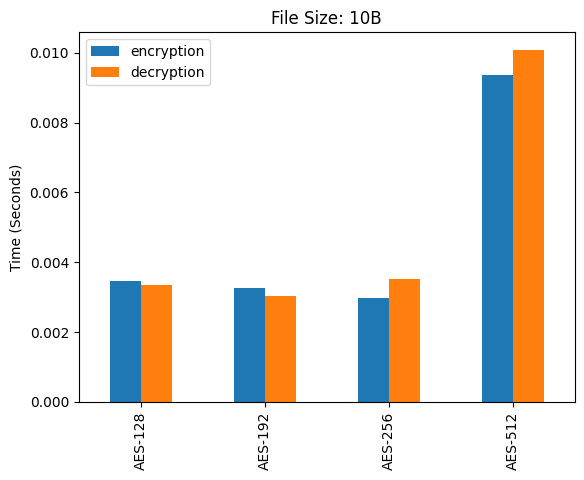

In [5]:
x = AESTime(KEY, 'sample01.txt', DATA[0])
x.drawChart(FILE_SIZE[0])

### File Size: 100 Bytes

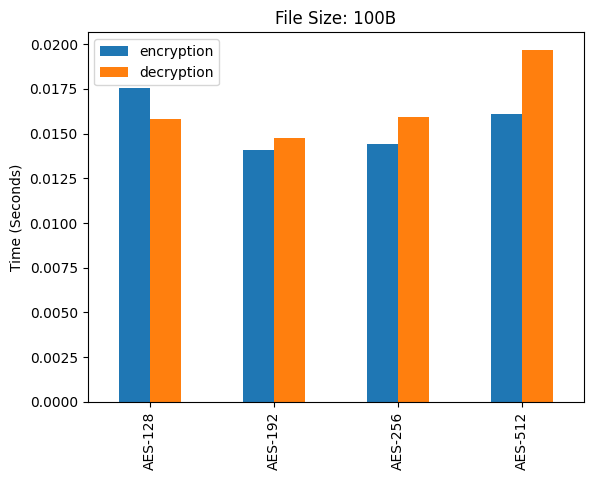

In [6]:
x = AESTime(KEY, 'sample02.txt', DATA[1])
x.drawChart(FILE_SIZE[1])

### File Size: 1000 Bytes

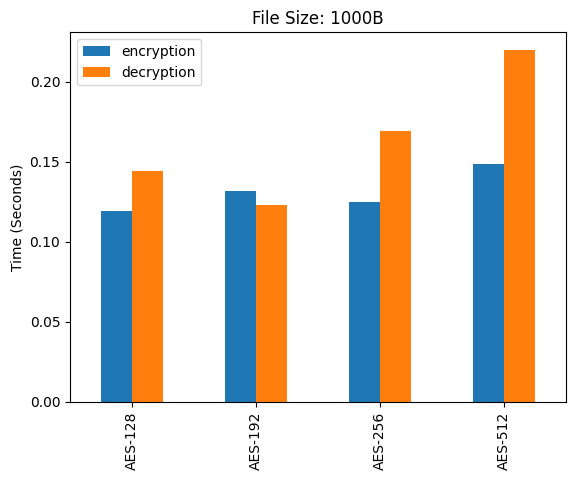

In [7]:
x = AESTime(KEY, 'sample03.txt', DATA[2])
x.drawChart(FILE_SIZE[2])

### File Size: 10000 Bytes

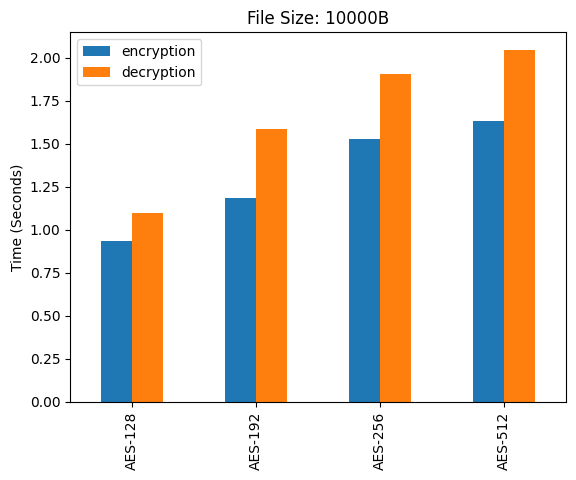

In [8]:
x = AESTime(KEY, 'sample04.txt', DATA[3])
x.drawChart(FILE_SIZE[3])

### File Size: 100000 Bytes

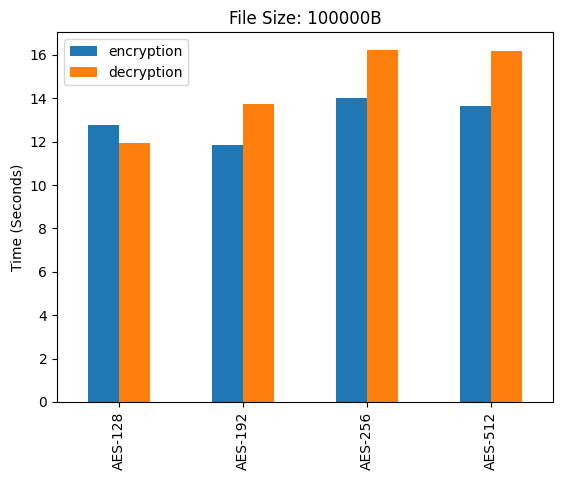

In [9]:
x = AESTime(KEY, 'sample05.txt', DATA[4])
x.drawChart(FILE_SIZE[4])